In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import joblib

# Load data
df = pd.read_csv(r'C:\Users\rudra\OneDrive\Desktop\mobile_price\dataset.csv')

# Drop irrelevant features
df = df.drop(columns=['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi'])

# Split data
X = df.drop('price_range', axis=1)
y = df['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LogisticRegression(max_iter=2000, random_state=42)
model.fit(X_train_scaled, y_train)

# Save artifacts
joblib.dump(model, 'mobile_price_model.pkl')
joblib.dump(scaler, 'mobile_price_scaler.pkl')

['mobile_price_scaler.pkl']

Accuracy: 98.50%
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       105
           1       0.96      1.00      0.98        91
           2       1.00      0.95      0.97        92
           3       0.98      1.00      0.99       112

    accuracy                           0.98       400
   macro avg       0.99      0.98      0.98       400
weighted avg       0.99      0.98      0.98       400



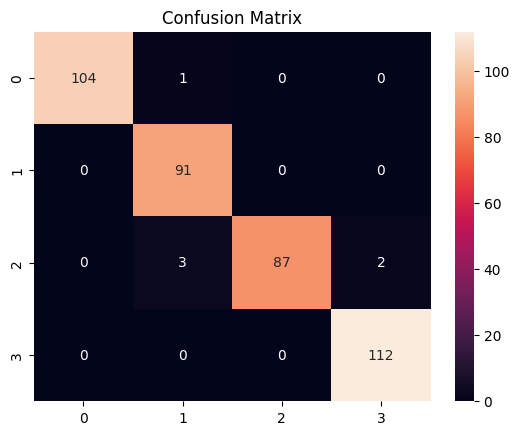

In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate
y_pred = model.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print(classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()